<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/AssNo04Q01(Delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/delivery_time.csv')

# **Performing EDA**

In [3]:
#Rename  Columns Name Remove white space between words
data = data.rename(columns={
    "Delivery Time":"Delivery_Time",
    "Sorting Time":"Sorting_Time"
})

In [4]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.shape

(21, 2)

In [6]:
# Information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# **Data Visualization**

<Axes: >

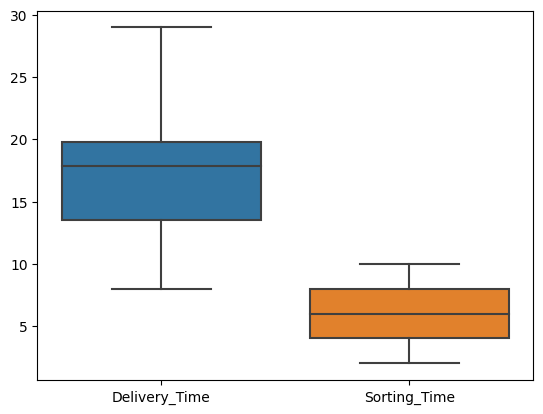

In [8]:
# Finding outliers
sns.boxplot(data)

From above boxplots , we can state that no outliers are present in the dataset.

# **Density Plot**

<ipython-input-9-8435a17ffa52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Delivery_Time)


<Axes: xlabel='Delivery_Time', ylabel='Density'>

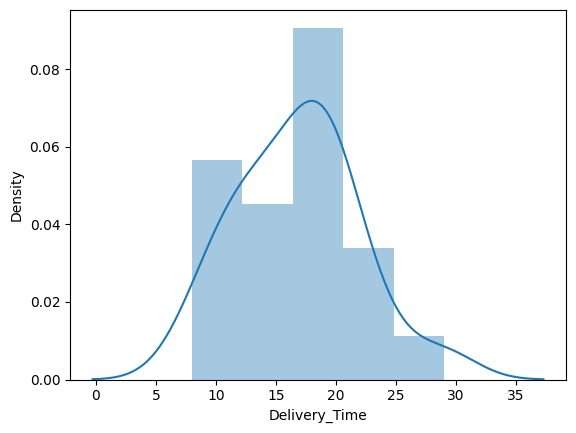

In [9]:
sns.distplot(data.Delivery_Time)

<ipython-input-10-df808c828aa4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Sorting_Time)


<Axes: xlabel='Sorting_Time', ylabel='Density'>

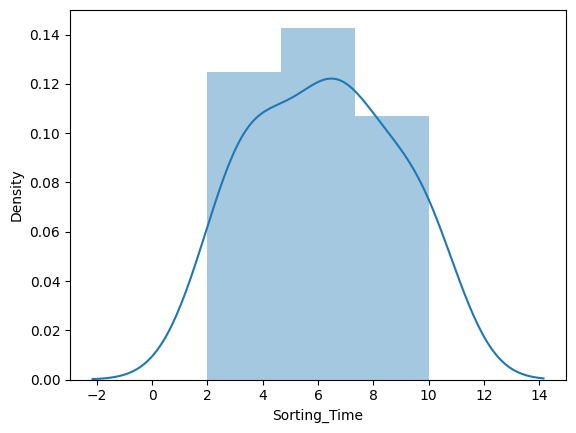

In [10]:
sns.distplot(data.Sorting_Time)

# Correlation

In [11]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# Fitting Linear Regression Model

In [12]:
import statsmodels.formula.api as smf

model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        06:08:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

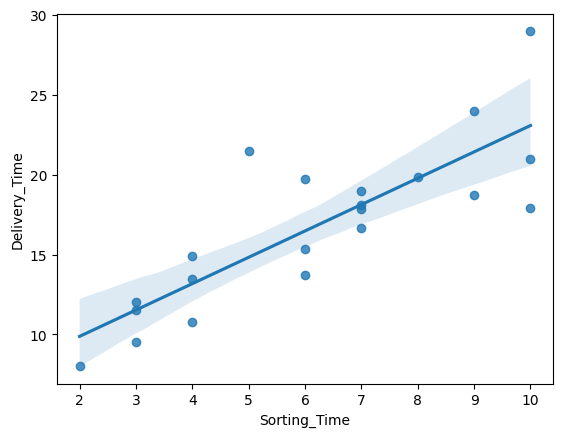

In [15]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [16]:
# Coefficients are B0=Intercept and B1=Sorting_Time
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [17]:
print("***T Values :***\n",model.tvalues,'\n','***P Values :***\n',model.pvalues)

***T Values :***
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 ***P Values :***
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


p value < alpha --> Reject Null Hypothesis

# Model prediction

In [18]:
# Predict for sorting time is 21 and 4
newdata = pd.Series([21,4])
newdata

0    21
1     4
dtype: int64

In [19]:
pred_data = pd.DataFrame(newdata,columns=['Sorting_Time'])
pred_data

,Sorting_Time
0,21
1,4


Regression model

In [20]:
model.predict(pred_data)

0    41.212152
1    13.178814
dtype: float64

##**Building model with Logarithmic Transformation**

# **Y = a + b * log(x)**

In [31]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_sorting_time'] = np.log(data1.Sorting_Time)
data1.head()

,Delivery_Time,Sorting_Time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [32]:
# Building model
log_model = smf.ols('Delivery_Time ~ log_sorting_time', data = data1).fit()

In [35]:
log_model.params

Intercept           1.159684
log_sorting_time    9.043413
dtype: float64

In [36]:
print("tvalue: ", log_model.tvalues)
print("pvalue: ", log_model.pvalues)

tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64


In [38]:
predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.Delivery_Time, 'Delivery_Time_Predicted' : predicted_time})
pred_df.head()

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913


In [39]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.64e-06
Time:                        06:23:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

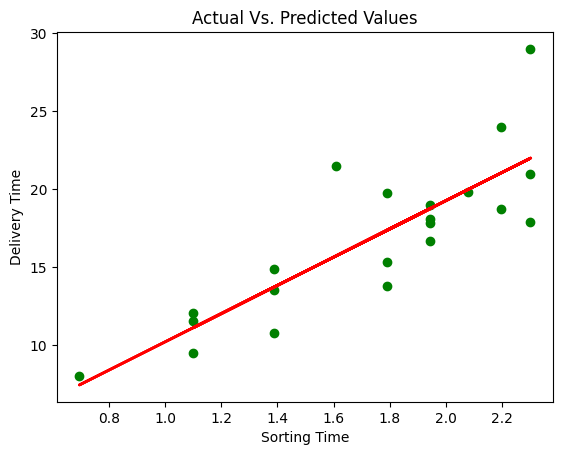

In [41]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_sorting_time, data1.Delivery_Time,  color='green')
plt.plot(data1.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [50]:
# Calculating Errors
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Delivery_Time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.Delivery_Time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Delivery_Time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.Delivery_Time, predicted_time))


Mean Absolute Error: 2.047375706792902
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score :           0.6954434611324223


p-value from the test: below 0.05 generally means non-normal: 0.182011043219638
Residuals are normally distributed


<ipython-input-52-3cd9fddbe79c>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


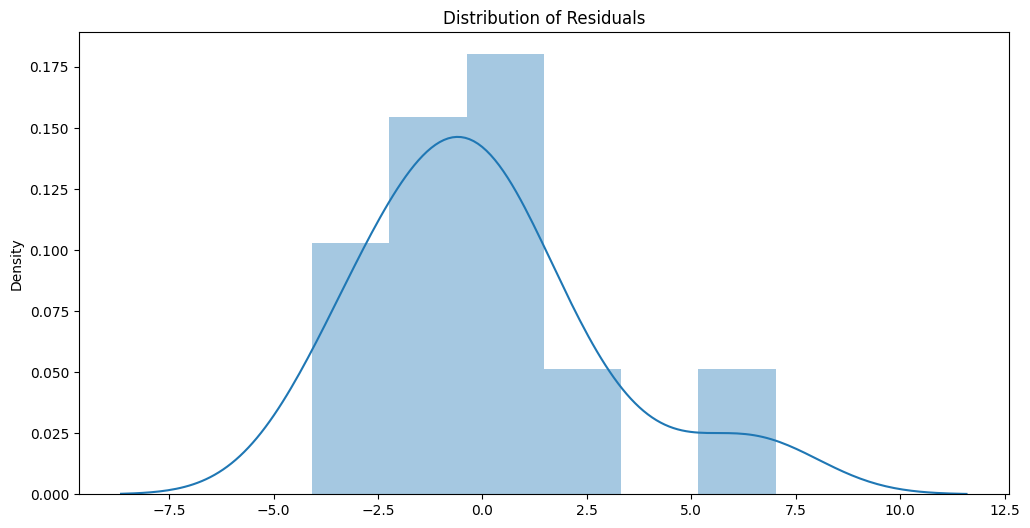

In [52]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Delivery_Time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()